# DeepSleep 
## Notas
* En Saola hay periodos que no se va a dormir y se une con el siguiente. Probar si es por el tamaño de los periodos

## v1

- board
- r (run duration)
- ds (deep sleep duration)
- TX (test version)

## T

240seg a 10ms

In [46]:
board="saola"
r = 15
ds = 15
TX = 1

batteries = [0.8, 2, 4, 10] #Ah

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

filename = f"../data/dslp--{board}_r{r}_ds{ds}-T{TX}.csv"
print(filename)

df = pd.read_csv(filename, parse_dates=["read_at", "timestamp"])

df.columns = ['index','read_at', 'millis', "dt", "v", "a", "w", "v_sh"]
df

../data/dslp--saola_r15_ds15-T1.csv


,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-28 18:06:49.855030,103592,2025-02-28 18:06:49,5.048,0.0940,0.47451,0.00940
1,1,2025-02-28 18:06:49.865987,103602,2025-02-28 18:06:49,5.048,0.0948,0.47855,0.00948
2,2,2025-02-28 18:06:49.878869,103615,2025-02-28 18:06:49,5.048,0.0948,0.47855,0.00948
3,3,2025-02-28 18:06:49.889186,103625,2025-02-28 18:06:49,5.048,0.0952,0.48057,0.00952
4,4,2025-02-28 18:06:49.900964,103637,2025-02-28 18:06:49,5.048,0.0956,0.48259,0.00956
...,...,...,...,...,...,...,...,...
20958,20958,2025-02-28 18:10:49.806980,343534,2025-02-28 18:10:49,5.048,0.0924,0.46644,0.00924
20959,20959,2025-02-28 18:10:49.816858,343544,2025-02-28 18:10:49,5.048,0.0924,0.46644,0.00924
20960,20960,2025-02-28 18:10:49.828831,343556,2025-02-28 18:10:49,5.048,0.0944,0.47653,0.00944
20961,20961,2025-02-28 18:10:49.839556,343567,2025-02-28 18:10:49,5.048,0.0940,0.47451,0.00940


In [48]:
#remove the trailing data before reset
d = df#[df.millis.idxmin():]
d

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-02-28 18:06:49.855030,103592,2025-02-28 18:06:49,5.048,0.0940,0.47451,0.00940
1,1,2025-02-28 18:06:49.865987,103602,2025-02-28 18:06:49,5.048,0.0948,0.47855,0.00948
2,2,2025-02-28 18:06:49.878869,103615,2025-02-28 18:06:49,5.048,0.0948,0.47855,0.00948
3,3,2025-02-28 18:06:49.889186,103625,2025-02-28 18:06:49,5.048,0.0952,0.48057,0.00952
4,4,2025-02-28 18:06:49.900964,103637,2025-02-28 18:06:49,5.048,0.0956,0.48259,0.00956
...,...,...,...,...,...,...,...,...
20958,20958,2025-02-28 18:10:49.806980,343534,2025-02-28 18:10:49,5.048,0.0924,0.46644,0.00924
20959,20959,2025-02-28 18:10:49.816858,343544,2025-02-28 18:10:49,5.048,0.0924,0.46644,0.00924
20960,20960,2025-02-28 18:10:49.828831,343556,2025-02-28 18:10:49,5.048,0.0944,0.47653,0.00944
20961,20961,2025-02-28 18:10:49.839556,343567,2025-02-28 18:10:49,5.048,0.0940,0.47451,0.00940


Text(0.5, 1.0, 'Current')

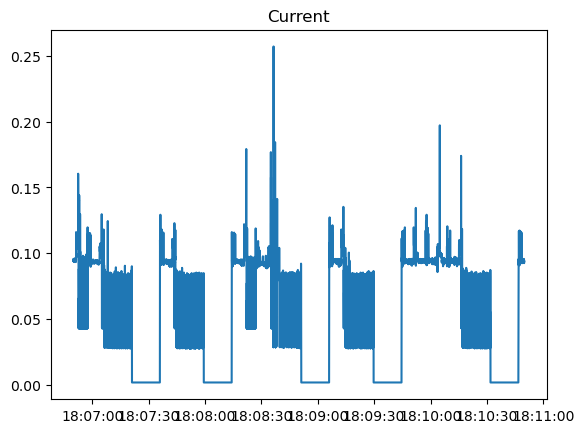

In [49]:
plt.plot(d.read_at, d.a)
plt.title("Current")

Text(0.5, 1.0, 'Voltage')

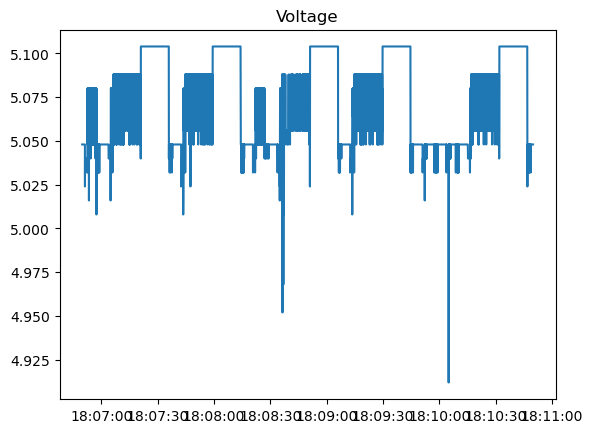

In [50]:
plt.plot(d.read_at, d.v)
plt.title("Voltage")

In [51]:
from scipy import integrate

time_data = (d.read_at - d.read_at.iloc[0]).dt.total_seconds()
current_data = d.a.to_numpy()
total_current = integrate.trapezoid(current_data, time_data)
total_current #A in timespan

np.float64(12.047082029999999)

In [52]:
time_span = max(time_data)
time_span #seg

239.995555

In [53]:
avg_current = total_current / time_span
avg_current #A

np.float64(0.05019710481721213)

## Expected runtime using batteries

In [54]:
for bat_usable_cap in batteries: #Amp hour
    runtime = bat_usable_cap / avg_current
    print(f"At {bat_usable_cap:.02f}Ah:\t{runtime:.01f} hours,\t{runtime/24:.02f} days")

At 0.80Ah:	15.9 hours,	0.66 days
At 2.00Ah:	39.8 hours,	1.66 days
At 4.00Ah:	79.7 hours,	3.32 days
At 10.00Ah:	199.2 hours,	8.30 days
